# Diagnosing breast cancer with k-NN
We will use the "Breast Cancer Wisconsin Diagnostic" dataset from the UCI Machine Learning Repository, which is available at http://archive.ics.uci.edu/ml.

The breast cancer data includes 569 examples of cancer biopsies, each with 32 features. One feature is an identification number, another is the cancer diagnosis, and 30 are numeric-valued laboratory measurements. The diagnosis is coded as M to indicate malignant or B to indicate benign.

## Import data file

In [1]:
# Load data
wbcd <- read.csv("https://resources.oreilly.com/examples/9781784393908/raw/ac9fe41596dd42fc3877cfa8ed410dd346c43548/Machine%20Learning%20with%20R,%20Second%20Edition_Code/Chapter%2003/wisc_bc_data.csv")

# Examine the structure of the wbcd data frame
str(wbcd)
wbcd

'data.frame':	569 obs. of  32 variables:
 $ id               : int  87139402 8910251 905520 868871 9012568 906539 925291 87880 862989 89827 ...
 $ diagnosis        : Factor w/ 2 levels "B","M": 1 1 1 1 1 1 1 2 1 1 ...
 $ radius_mean      : num  12.3 10.6 11 11.3 15.2 ...
 $ texture_mean     : num  12.4 18.9 16.8 13.4 13.2 ...
 $ perimeter_mean   : num  78.8 69.3 70.9 73 97.7 ...
 $ area_mean        : num  464 346 373 385 712 ...
 $ smoothness_mean  : num  0.1028 0.0969 0.1077 0.1164 0.0796 ...
 $ compactness_mean : num  0.0698 0.1147 0.078 0.1136 0.0693 ...
 $ concavity_mean   : num  0.0399 0.0639 0.0305 0.0464 0.0339 ...
 $ points_mean      : num  0.037 0.0264 0.0248 0.048 0.0266 ...
 $ symmetry_mean    : num  0.196 0.192 0.171 0.177 0.172 ...
 $ dimension_mean   : num  0.0595 0.0649 0.0634 0.0607 0.0554 ...
 $ radius_se        : num  0.236 0.451 0.197 0.338 0.178 ...
 $ texture_se       : num  0.666 1.197 1.387 1.343 0.412 ...
 $ perimeter_se     : num  1.67 3.43 1.34 1.85 1.34 ...
 

id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,⋯,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
87139402,B,12.320,12.39,78.85,464.1,0.10280,0.06981,0.039870,0.037000,⋯,13.50,15.64,86.97,549.1,0.1385,0.12660,0.124200,0.09391,0.2827,0.06771
8910251,B,10.600,18.95,69.28,346.4,0.09688,0.11470,0.063870,0.026420,⋯,11.88,22.94,78.28,424.8,0.1213,0.25150,0.191600,0.07926,0.2940,0.07587
905520,B,11.040,16.83,70.92,373.2,0.10770,0.07804,0.030460,0.024800,⋯,12.41,26.44,79.93,471.4,0.1369,0.14820,0.106700,0.07431,0.2998,0.07881
868871,B,11.280,13.39,73.00,384.8,0.11640,0.11360,0.046350,0.047960,⋯,11.92,15.77,76.53,434.0,0.1367,0.18220,0.086690,0.08611,0.2102,0.06784
9012568,B,15.190,13.21,97.65,711.8,0.07963,0.06934,0.033930,0.026570,⋯,16.20,15.73,104.50,819.1,0.1126,0.17370,0.136200,0.08178,0.2487,0.06766
906539,B,11.570,19.04,74.20,409.7,0.08546,0.07722,0.054850,0.014280,⋯,13.07,26.98,86.43,520.5,0.1249,0.19370,0.256000,0.06664,0.3035,0.08284
925291,B,11.510,23.93,74.52,403.5,0.09261,0.10210,0.111200,0.041050,⋯,12.48,37.16,82.28,474.2,0.1298,0.25170,0.363000,0.09653,0.2112,0.08732
87880,M,13.810,23.75,91.56,597.8,0.13230,0.17680,0.155800,0.091760,⋯,19.20,41.85,128.50,1153.0,0.2226,0.52090,0.464600,0.20130,0.4432,0.10860
862989,B,10.490,19.29,67.41,336.1,0.09989,0.08578,0.029950,0.012010,⋯,11.54,23.31,74.22,402.8,0.1219,0.14860,0.079870,0.03203,0.2826,0.07552


## Preprocess data

In [2]:
# Drop the id feature
wbcd <- wbcd[, -1]

In [3]:
# Table of diagnosis
table(wbcd$diagnosis)


  B   M 
357 212 

In [36]:
# Recode diagnosis
levels(wbcd$diagnosis) <- c("Benign", "Malignant")
table(wbcd$diagnosis)


   Benign Malignant 
      357       212 

In [38]:
# Table or proportions with more informative labels
round(prop.table(table(wbcd$diagnosis)) * 100, digits = 1)


   Benign Malignant 
     62.7      37.3 

In [39]:
# Summarize features
summary(wbcd)

     diagnosis    radius_mean      texture_mean   perimeter_mean  
 Benign   :357   Min.   : 6.981   Min.   : 9.71   Min.   : 43.79  
 Malignant:212   1st Qu.:11.700   1st Qu.:16.17   1st Qu.: 75.17  
                 Median :13.370   Median :18.84   Median : 86.24  
                 Mean   :14.127   Mean   :19.29   Mean   : 91.97  
                 3rd Qu.:15.780   3rd Qu.:21.80   3rd Qu.:104.10  
                 Max.   :28.110   Max.   :39.28   Max.   :188.50  
   area_mean      smoothness_mean   compactness_mean  concavity_mean   
 Min.   : 143.5   Min.   :0.05263   Min.   :0.01938   Min.   :0.00000  
 1st Qu.: 420.3   1st Qu.:0.08637   1st Qu.:0.06492   1st Qu.:0.02956  
 Median : 551.1   Median :0.09587   Median :0.09263   Median :0.06154  
 Mean   : 654.9   Mean   :0.09636   Mean   :0.10434   Mean   :0.08880  
 3rd Qu.: 782.7   3rd Qu.:0.10530   3rd Qu.:0.13040   3rd Qu.:0.13070  
 Max.   :2501.0   Max.   :0.16340   Max.   :0.34540   Max.   :0.42680  
  points_mean      symmetry

In [40]:
library(reshape2)

mwbcd <- melt(wbcd)
mwbcd

Using diagnosis as id variables



diagnosis,variable,value
<fct>,<fct>,<dbl>
Benign,radius_mean,12.320
Benign,radius_mean,10.600
Benign,radius_mean,11.040
Benign,radius_mean,11.280
Benign,radius_mean,15.190
Benign,radius_mean,11.570
Benign,radius_mean,11.510
Malignant,radius_mean,13.810
Benign,radius_mean,10.490


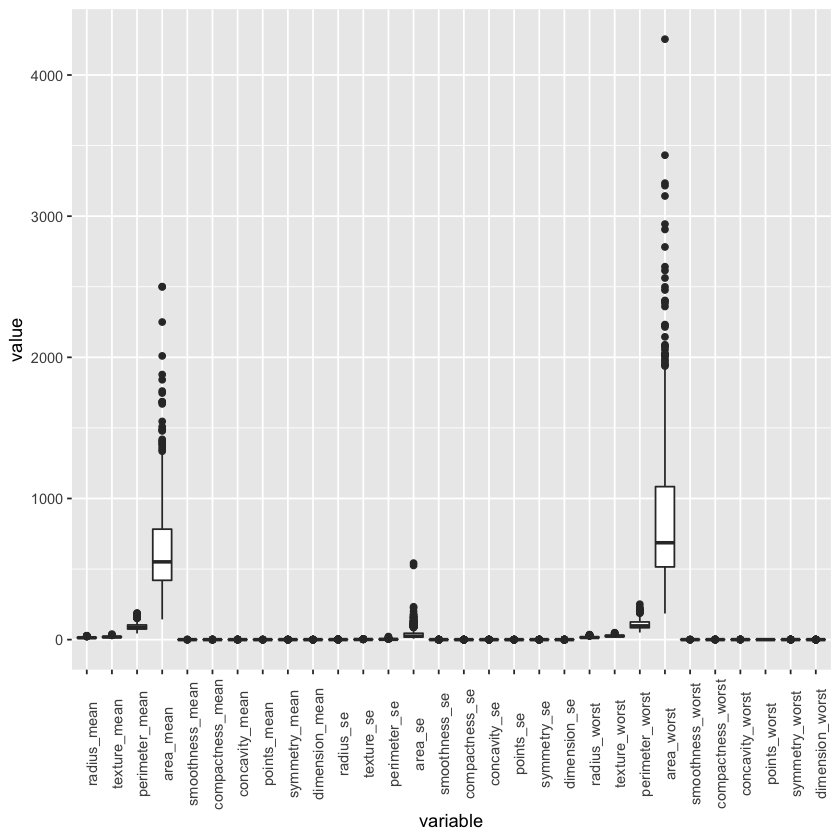

In [47]:
library(ggplot2)

# Plot boxplots
ggplot(data=mwbcd, aes(x=variable, y=value)) + geom_boxplot() + theme(axis.text.x = element_text(angle = 90))

In [49]:
?scale

In [14]:
# Normalize the wbcd data
wbcd_n <- cbind(diagnosis=wbcd[,1], as.data.frame(lapply(wbcd[,2:31], scale, center = TRUE, scale = TRUE)))

# Confirm that normalization worked
summary(wbcd_n[,c("radius_mean", "area_mean", "smoothness_mean")])

  radius_mean        area_mean       smoothness_mean   
 Min.   :-2.0279   Min.   :-1.4532   Min.   :-3.10935  
 1st Qu.:-0.6888   1st Qu.:-0.6666   1st Qu.:-0.71034  
 Median :-0.2149   Median :-0.2949   Median :-0.03486  
 Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.00000  
 3rd Qu.: 0.4690   3rd Qu.: 0.3632   3rd Qu.: 0.63564  
 Max.   : 3.9678   Max.   : 5.2459   Max.   : 4.76672  

Using diagnosis as id variables



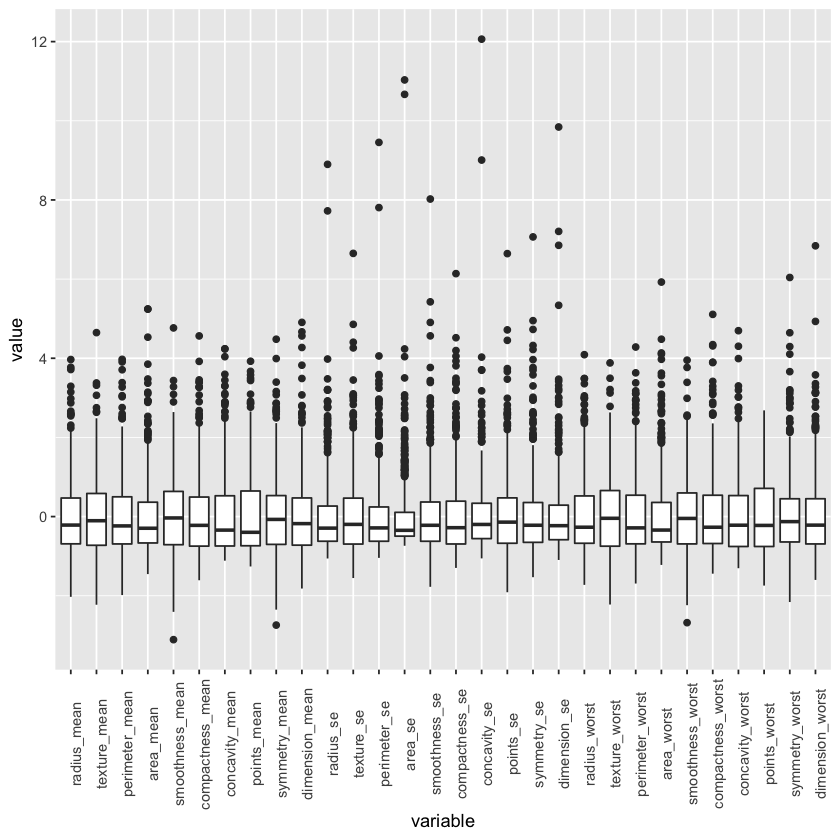

In [50]:
mwbcd_n <- melt(wbcd_n)

# Plot boxplots
ggplot(data=mwbcd_n, aes(x=variable, y=value)) + geom_boxplot() + theme(axis.text.x = element_text(angle = 90))

In [51]:
# Notices that scales does not affect other properties...

cor(wbcd[,2:5])
cor(wbcd_n[,2:5])

,radius_mean,texture_mean,perimeter_mean,area_mean
radius_mean,1.0000000,0.3237819,0.9978553,0.9873572
texture_mean,0.3237819,1.0000000,0.3295331,0.3210857
perimeter_mean,0.9978553,0.3295331,1.0000000,0.9865068
area_mean,0.9873572,0.3210857,0.9865068,1.0000000


,radius_mean,texture_mean,perimeter_mean,area_mean
radius_mean,1.0000000,0.3237819,0.9978553,0.9873572
texture_mean,0.3237819,1.0000000,0.3295331,0.3210857
perimeter_mean,0.9978553,0.3295331,1.0000000,0.9865068
area_mean,0.9873572,0.3210857,0.9865068,1.0000000


## Visualize data

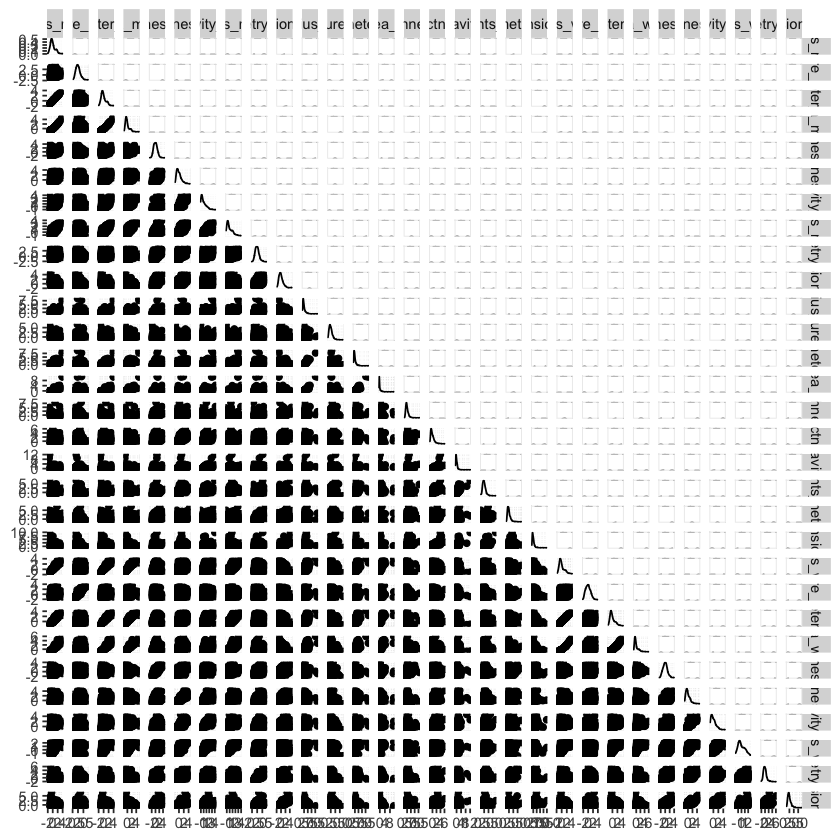

In [52]:
library(GGally)

ggpairs(wbcd_n[,-1])

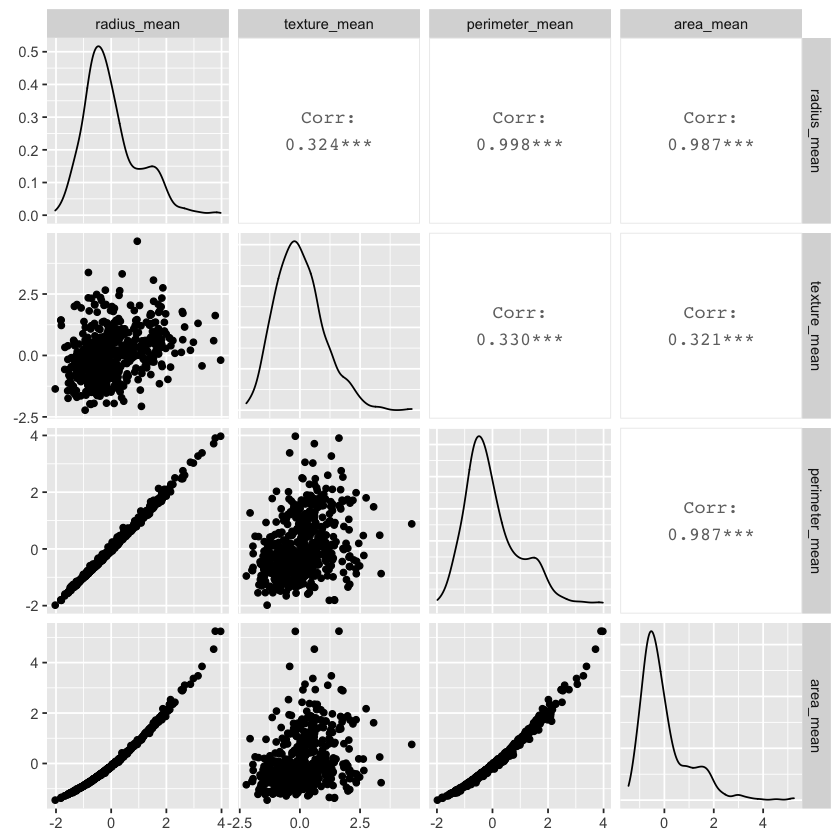

In [53]:
ggpairs(wbcd_n[,2:5])

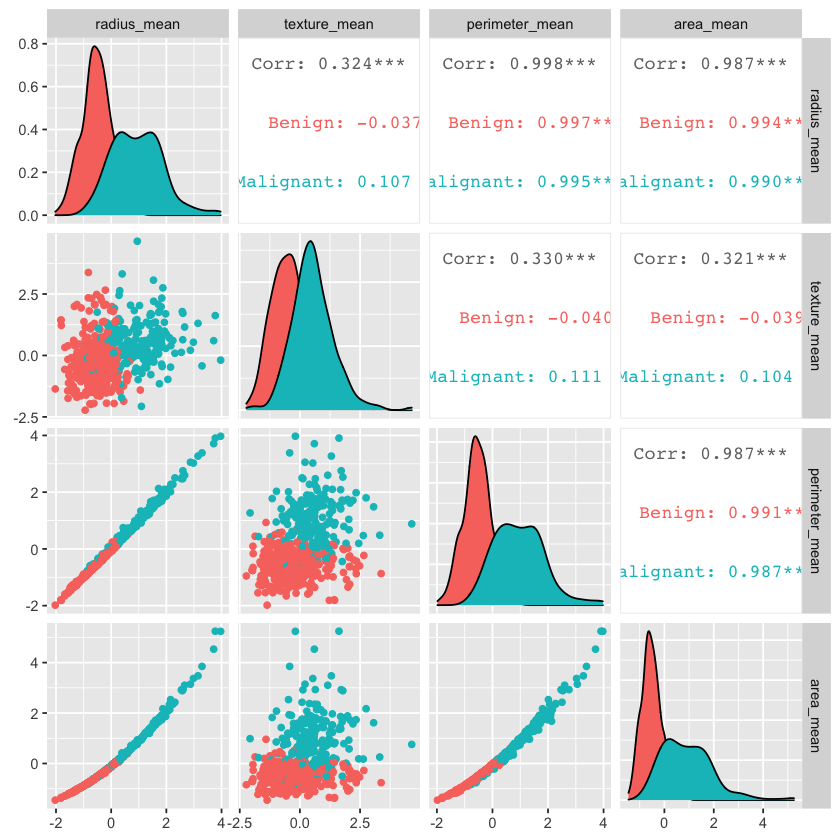

In [54]:
ggpairs(wbcd_n[,2:5], aes(col=wbcd_n[,1]))

## Piece by piece

### Create training and test datasets

In [55]:
# Create training and test data (holdout 90%-10%)
shuffle_ds <- sample(dim(wbcd_n)[1])
pct90 <- (dim(wbcd_n)[1] * 90) %/% 100
wbcd_train <- wbcd_n[shuffle_ds[1:pct90], -1]
wbcd_test <- wbcd_n[shuffle_ds[(pct90+1):dim(wbcd_n)[1]], -1]

# Create labels for training and test data
wbcd_train_labels <- wbcd_n[shuffle_ds[1:pct90], 1]
wbcd_test_labels <- wbcd_n[shuffle_ds[(pct90+1):dim(wbcd_n)[1]], 1]

### Training a model on the data

In [56]:
library(class)

?knn

In [57]:
wbcd_test_pred <- knn(train = wbcd_train, test = wbcd_test, cl = wbcd_train_labels, k=21)
wbcd_test_pred

[1] Benign    Benign    Malignant Benign    Benign    Benign    Benign   
 [8] Malignant Malignant Benign    Malignant Malignant Benign    Benign   
[15] Malignant Benign    Malignant Benign    Benign    Malignant Benign   
[22] Benign    Benign    Benign    Benign    Benign    Benign    Benign   
[29] Benign    Benign    Malignant Benign    Malignant Malignant Benign   
[36] Benign    Benign    Benign    Benign    Benign    Benign    Benign   
[43] Benign    Benign    Benign    Malignant Benign    Malignant Malignant
[50] Benign    Benign    Malignant Malignant Benign    Malignant Malignant
[57] Malignant
Levels: Benign Malignant

In [58]:
# Evaluating model performance
table(wbcd_test_pred, wbcd_test_labels)

              wbcd_test_labels
wbcd_test_pred Benign Malignant
     Benign        37         1
     Malignant      0        19

## Using `caret`

### Training a model on the data

In [61]:
library(caret)

?train

In [62]:
knnModel <- train(x = wbcd_train, y = wbcd_train_labels, method = "knn", 
                  trControl = trainControl(method = "cv"), tuneLength = 5)

knnModel

k-Nearest Neighbors 

512 samples
 30 predictor
  2 classes: 'Benign', 'Malignant' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 461, 460, 461, 461, 461, 461, ... 
Resampling results across tuning parameters:

  k   Accuracy   Kappa    
   5  0.9707014  0.9364894
   7  0.9667798  0.9277317
   9  0.9648944  0.9237847
  11  0.9707391  0.9362902
  13  0.9629713  0.9194064

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 11.

In [63]:
knnModel <- train(wbcd_train, wbcd_train_labels, method="knn", metric="Accuracy", tuneGrid = data.frame(.k=1:15))
knnModel

k-Nearest Neighbors 

512 samples
 30 predictor
  2 classes: 'Benign', 'Malignant' 

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 512, 512, 512, 512, 512, 512, ... 
Resampling results across tuning parameters:

  k   Accuracy   Kappa    
   1  0.9522585  0.8969625
   2  0.9488020  0.8893859
   3  0.9511083  0.8943120
   4  0.9512004  0.8944127
   5  0.9547587  0.9021421
   6  0.9555499  0.9038787
   7  0.9588805  0.9108550
   8  0.9558367  0.9043108
   9  0.9590831  0.9114161
  10  0.9603784  0.9141334
  11  0.9597953  0.9127933
  12  0.9594610  0.9120859
  13  0.9611477  0.9156035
  14  0.9587020  0.9102295
  15  0.9589988  0.9108885

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 13.

In [64]:
knnModel <- train(x = wbcd[shuffle_ds[1:pct90],-1], y = wbcd[shuffle_ds[1:pct90],1],
                  method = "knn", preProc = c("center", "scale"))
knnModel

k-Nearest Neighbors 

512 samples
 30 predictor
  2 classes: 'Benign', 'Malignant' 

Pre-processing: centered (30), scaled (30) 
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 512, 512, 512, 512, 512, 512, ... 
Resampling results across tuning parameters:

  k  Accuracy   Kappa    
  5  0.9538992  0.9005078
  7  0.9552351  0.9031672
  9  0.9586431  0.9105515

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 9.

### Predicting using the model

In [65]:
knnPred <- predict(knnModel, newdata = wbcd[shuffle_ds[(pct90+1):dim(wbcd)[1]], -1])
knnPred

[1] Benign    Benign    Malignant Benign    Benign    Benign    Benign   
 [8] Malignant Malignant Benign    Malignant Malignant Benign    Benign   
[15] Malignant Benign    Malignant Benign    Benign    Malignant Benign   
[22] Benign    Benign    Benign    Benign    Benign    Benign    Benign   
[29] Benign    Benign    Malignant Benign    Malignant Malignant Benign   
[36] Benign    Benign    Benign    Benign    Benign    Benign    Benign   
[43] Benign    Benign    Benign    Malignant Benign    Malignant Malignant
[50] Benign    Benign    Malignant Malignant Benign    Malignant Malignant
[57] Malignant
Levels: Benign Malignant

In [66]:
postResample(pred = knnPred, obs = wbcd[shuffle_ds[(pct90+1):dim(wbcd)[1]], 1])

Accuracy     Kappa 
0.9824561 0.9610390

In [67]:
table(knnPred, wbcd[shuffle_ds[(pct90+1):dim(wbcd)[1]], 1])

           
knnPred     Benign Malignant
  Benign        37         1
  Malignant      0        19

## Using other distance measures

In [69]:
library(philentropy)

getDistMethods()

[1] "euclidean"         "manhattan"         "minkowski"        
 [4] "chebyshev"         "sorensen"          "gower"            
 [7] "soergel"           "kulczynski_d"      "canberra"         
[10] "lorentzian"        "intersection"      "non-intersection" 
[13] "wavehedges"        "czekanowski"       "motyka"           
[16] "kulczynski_s"      "tanimoto"          "ruzicka"          
[19] "inner_product"     "harmonic_mean"     "cosine"           
[22] "hassebrook"        "jaccard"           "dice"             
[25] "fidelity"          "bhattacharyya"     "hellinger"        
[28] "matusita"          "squared_chord"     "squared_euclidean"
[31] "pearson"           "neyman"            "squared_chi"      
[34] "prob_symm"         "divergence"        "clark"            
[37] "additive_symm"     "kullback-leibler"  "jeffreys"         
[40] "k_divergence"      "topsoe"            "jensen-shannon"   
[43] "jensen_difference" "taneja"            "kumar-johnson"    
[46] "avg"

In [70]:
?distance

In [77]:
xmat1 <- rbind(wbcd_test[1,], wbcd_train[1,])
xmat2 <- rbind(wbcd_test[1,], wbcd_train[20,])

distance(as.data.frame(xmat1), method='euclidean')
distance(as.data.frame(xmat1), method='chebyshev')

distance(as.data.frame(xmat2), method='euclidean')
distance(as.data.frame(xmat2), method='chebyshev')

Metric: 'euclidean'; comparing: 2 vectors.



euclidean 
 4.727025

Metric: 'chebyshev'; comparing: 2 vectors.



chebyshev 
 2.796824

Metric: 'euclidean'; comparing: 2 vectors.



euclidean 
  6.45077

Metric: 'chebyshev'; comparing: 2 vectors.



chebyshev 
 2.573924

## Exercise
* Create a function `my_knn` that accepts any measure from the `philentropy` package and performs basic knn.
* Select two distance/similarity measures and apply your knn function to each of them with different k choices for the breast cancer data and do a plot comparing the results.

In [ ]:
library("philentropy")
library("tidyverse")

In [ ]:
wbcd <- read.csv("https://resources.oreilly.com/examples/9781784393908/raw/ac9fe41596dd42fc3877cfa8ed410dd346c43548/Machine%20Learning%20with%20R,%20Second%20Edition_Code/Chapter%2003/wisc_bc_data.csv")

wbcd <- na.omit(wbcd)
classes <- wbcd[, 2]
wbcd <- wbcd[, -(1:2)] %>% scale()

- Los datos se deben estandarizar antes
- La función de philentropy no permite suprimir los mensajes
- El algoritmo es exageradamente lento, no usarlo con muchos datos de test

In [ ]:
# From Github
# En caso de empate, devuelve una cualquiera
Mode <- function(x) {
  ux <- unique(x)
  ux[which.max(tabulate(match(x, ux)))]
}

# The function will output the predictions over the test set (if given) or using the train set also as test set.
my_knn <- function(train, train_labels, test=NA, k=1, metric="euclidean") {
  
  # Aplica knn a una fila
  knn <- function(test, train, train_labels, k=1, metric) {
    
    # Calcula distancia entre dos filas
    dist <- function(v1, v2, m) {
      bind_rows(data.frame(t(v1)) , v2) %>% 
        distance(method = m)
    }
    
    y <- train %>% apply(1, dist, v2=test, m=metric)
    
    # Ordenamos
    z <- y %>% sort() %>% head(k)
    
    # Cogemos los índices
    z <- z %>% names() %>% as.integer()
    
    # Cogemos la clase mayoritaria (o desempatamos)
    train_labels[z] %>% Mode()
  }
  
  x <- if (is.na(test)) train else test

  x %>% apply(1, knn, train, train_labels, k, metric)
}

train <- wbcd[-c(1,75),]
test <- wbcd[c(1,75),]

c1 <- my_knn(train, classes, test, 3, "euclidean")
c2 <- my_knn(train, classes, test, 3, "avg")
c3 <- my_knn(train, classes, test, 3, "pearson")

In [ ]:
c1
c2
c3